# RFM

How can an e-commerce company identify high-value customers and design personalized cross-sell and
up-sell strategies using RFM segmentation and Market Basket Analysis to increase revenue and customer retention?”


In [1]:
import pandas as pd 
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:

df = pd.read_csv('ta_feng_all_months_merged.csv')

In [3]:
df.shape

(817741, 9)

In [4]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18


In [5]:
df.tail()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
817736,2/28/2001,312790,35-39,114,530501,4713317035042,2,80,118
817737,2/28/2001,57486,40-44,115,530209,4710731060124,1,40,55
817738,2/28/2001,733526,>65,Unknown,510539,4716340052307,1,78,115
817739,2/28/2001,173704,45-49,115,520457,4714276145315,1,90,96
817740,2/28/2001,1719888,30-34,221,530202,4713080610231,1,158,199


now here we observe that there is a problem that is making bundle of product for  costumer id with transaction date 
there is missing coloumn which very necesaary for MBA and making bundle 
here we come with a conclusion is thhere is need of add a coloumn called  ["TRANSACTION_ID"] by which can easily 
identify which of following product where bought togther or sharing same transaction id 
[transaction id = costumer id + transaction date] 

In [6]:
# FEATURE SELECTION ADDING NEW FEATURE CALLED ["TRANSACTION_ID"]

# Step 1: sort data
df = df.sort_values(by=["CUSTOMER_ID", "TRANSACTION_DT"])

# Step 2: identify new transaction
df["NEW_TXN_FLAG"] = (
    (df["CUSTOMER_ID"] != df["CUSTOMER_ID"].shift()) |
    (df["TRANSACTION_DT"] != df["TRANSACTION_DT"].shift())
)

# Step 3: generate TRANSACTION_ID
df["TRANSACTION_ID"] = df["NEW_TXN_FLAG"].cumsum()

# Optional: make it readable
df["TRANSACTION_ID"] = "TXN_" + df["TRANSACTION_ID"].astype(str)

# Drop helper column
df.drop(columns=["NEW_TXN_FLAG"], inplace=True)


In [7]:
df.shape

(817741, 10)

In [8]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID
542122,1/21/2001,1069,NaN,115,110333,4710320224661,1,361,425,TXN_1
542544,1/21/2001,1069,NaN,115,100311,4710022101208,1,197,198,TXN_1
542959,1/21/2001,1069,NaN,115,110333,4712603661644,1,313,348,TXN_1
89853,11/13/2000,1069,NaN,115,100205,9556439880610,1,80,89,TXN_2
90164,11/13/2000,1069,NaN,115,100314,4710176008699,1,78,98,TXN_2


The main reason (MOST IMPORTANT)
🔑 Because each row is a product line, not a unique transaction or customer behavior  Retail datasets are usually recorded at:
Transaction–Product level (line-item level)
This means:
Each row = one product entry
If the same product appears multiple times:
It will have the same unit price
Often the same quantity (usually 1)
So repetition is expected.
Variation happens across products and customers, not necessarily across rows.

In [9]:
df.tail()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID
265087,12/8/2000,20002000,NaN,Unknown,500108,2250271000072,1,9,14,TXN_119577
265856,12/8/2000,20002000,NaN,Unknown,130109,9300639800080,1,57,66,TXN_119577
266234,12/8/2000,20002000,NaN,Unknown,110117,78895423037,1,60,62,TXN_119577
661318,2/5/2001,20002000,NaN,Unknown,110411,4710085120680,3,48,36,TXN_119578
665142,2/5/2001,20002000,NaN,Unknown,110411,4710085120697,3,48,36,TXN_119578


In [10]:
mean_AMOUNT = df['AMOUNT'].mean()
std_AMOUNT = df['AMOUNT'].std()
print(f"Mean: {mean_AMOUNT}")
print(f"Standard Deviation: {std_AMOUNT:.2f}")

Mean: 1.3817810284674488
Standard Deviation: 2.90


In [11]:
mean = np.mean(df['SALES_PRICE'])
std_dev = np.std(df['SALES_PRICE'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")



Mean: 131.87558897010177
Standard Deviation: 631.0572475282565


In [12]:
print(df.columns)
#checking if coloumn perfectly fit in dataset 

Index(['TRANSACTION_DT', 'CUSTOMER_ID', 'AGE_GROUP', 'PIN_CODE',
       'PRODUCT_SUBCLASS', 'PRODUCT_ID', 'AMOUNT', 'ASSET', 'SALES_PRICE',
       'TRANSACTION_ID'],
      dtype='str')


In [13]:
df['AGE_GROUP'] = (
    df.groupby('CUSTOMER_ID')['AGE_GROUP']
      .transform('first')
)


this code fills in missing values or ensures consistency by replacing all entries 
in the 'AGE_GROUP' column with the first available value found for each unique 'CUSTOMER_ID'.
that means if there is nan in previuos then the next row where transform like first one 

In [14]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID
542122,1/21/2001,1069,NaN,115,110333,4710320224661,1,361,425,TXN_1
542544,1/21/2001,1069,NaN,115,100311,4710022101208,1,197,198,TXN_1
542959,1/21/2001,1069,NaN,115,110333,4712603661644,1,313,348,TXN_1
89853,11/13/2000,1069,NaN,115,100205,9556439880610,1,80,89,TXN_2
90164,11/13/2000,1069,NaN,115,100314,4710176008699,1,78,98,TXN_2


In [15]:
df.tail()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID
265087,12/8/2000,20002000,NaN,Unknown,500108,2250271000072,1,9,14,TXN_119577
265856,12/8/2000,20002000,NaN,Unknown,130109,9300639800080,1,57,66,TXN_119577
266234,12/8/2000,20002000,NaN,Unknown,110117,78895423037,1,60,62,TXN_119577
661318,2/5/2001,20002000,NaN,Unknown,110411,4710085120680,3,48,36,TXN_119578
665142,2/5/2001,20002000,NaN,Unknown,110411,4710085120697,3,48,36,TXN_119578


In [16]:
df.groupby('CUSTOMER_ID')['AGE_GROUP'].nunique().value_counts()
# grouping costumer having age group wise 
# here it come s with 31640 costumer have xactly one age group and 626 have no age group at all

AGE_GROUP
1    31640
0      626
Name: count, dtype: int64

In [17]:
df['AGE_GROUP'] = df['AGE_GROUP'].fillna('Unknown')
#handling missing values filling with unknown where there is no age group 

In [18]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID
542122,1/21/2001,1069,Unknown,115,110333,4710320224661,1,361,425,TXN_1
542544,1/21/2001,1069,Unknown,115,100311,4710022101208,1,197,198,TXN_1
542959,1/21/2001,1069,Unknown,115,110333,4712603661644,1,313,348,TXN_1
89853,11/13/2000,1069,Unknown,115,100205,9556439880610,1,80,89,TXN_2
90164,11/13/2000,1069,Unknown,115,100314,4710176008699,1,78,98,TXN_2


In [19]:
df.tail()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID
265087,12/8/2000,20002000,Unknown,Unknown,500108,2250271000072,1,9,14,TXN_119577
265856,12/8/2000,20002000,Unknown,Unknown,130109,9300639800080,1,57,66,TXN_119577
266234,12/8/2000,20002000,Unknown,Unknown,110117,78895423037,1,60,62,TXN_119577
661318,2/5/2001,20002000,Unknown,Unknown,110411,4710085120680,3,48,36,TXN_119578
665142,2/5/2001,20002000,Unknown,Unknown,110411,4710085120697,3,48,36,TXN_119578


In [20]:
df.info()

<class 'pandas.DataFrame'>
Index: 817741 entries, 542122 to 665142
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   TRANSACTION_DT    817741 non-null  str  
 1   CUSTOMER_ID       817741 non-null  int64
 2   AGE_GROUP         817741 non-null  str  
 3   PIN_CODE          817741 non-null  str  
 4   PRODUCT_SUBCLASS  817741 non-null  int64
 5   PRODUCT_ID        817741 non-null  int64
 6   AMOUNT            817741 non-null  int64
 7   ASSET             817741 non-null  int64
 8   SALES_PRICE       817741 non-null  int64
 9   TRANSACTION_ID    817741 non-null  str  
dtypes: int64(6), str(4)
memory usage: 89.6 MB


In [21]:
df.isnull().sum()

TRANSACTION_DT      0
CUSTOMER_ID         0
AGE_GROUP           0
PIN_CODE            0
PRODUCT_SUBCLASS    0
PRODUCT_ID          0
AMOUNT              0
ASSET               0
SALES_PRICE         0
TRANSACTION_ID      0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

What features are used for RFM analysis this is answer of why we doing analysis on thses two feature .
🔹 R – Recency = TRANSACTION_DT
🔹 F – Frequency= TRANSACTION_ID & CUSTOMER_ID
🔹 M – Monetary = AMOUNT  & SALES_PRICE

(Derived) REVENUE = AMOUNT × SALES_PRICE

👉 These are the only features that truly matter for RFM.

4️⃣ Features required for MBA (ONLY these)
✅ Mandatory

TRANSACTION_ID & PRODUCT_ID (or PRODUCT_SUBCLASS)

In [23]:
df[['AMOUNT', 'SALES_PRICE']].describe()

,AMOUNT,SALES_PRICE
count,817741.000000,817741.000000
mean,1.381781,131.875589
std,2.897473,631.057633
min,1.000000,1.000000
25%,1.000000,42.000000
50%,1.000000,76.000000
75%,1.000000,132.000000
max,1200.000000,444000.000000


Standard Deviation – Quick Reminder Summary
Standard deviation (std) tells how spread out the data is from the average (mean)
Small std → values are similar / close together
Large std → values are very different / far apart
🔍 Quick rule (always do this):
Compare std with mean
std ≈ mean → normal spread
std > mean → wide variation
std ≫ mean → extreme values / outliers present
🧠 In your data:
AMOUNT → std > mean → mostly 1 item, some bulk purchases
SALES_PRICE → std ≫ mean → cheap items + very expensive items
🧠 One-line memory hook:
Standard deviation shows how mixed the data is — bigger std means more variety and extremes.


I focused descriptive statistical analysis on amount and sales price because 
they are continuous behavioral variables that vary across transactions and directly drive revenue, whereas other features are
identifiers or categorical attributes better analyzed through frequency or grouping rather than numerical distribution.

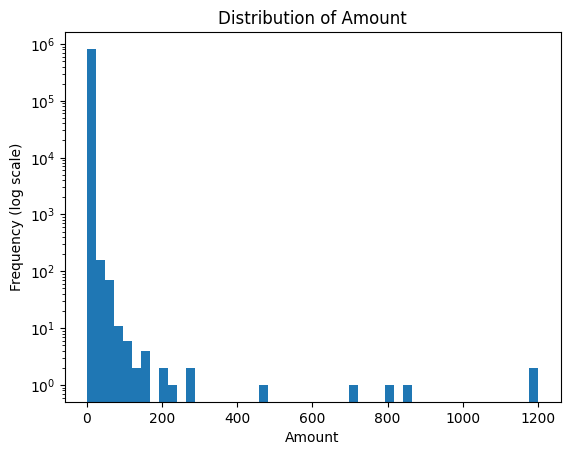

In [24]:
plt.figure()
plt.hist(df['AMOUNT'], bins=50)
plt.yscale('log')
plt.xlabel('Amount')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Amount')
plt.show()

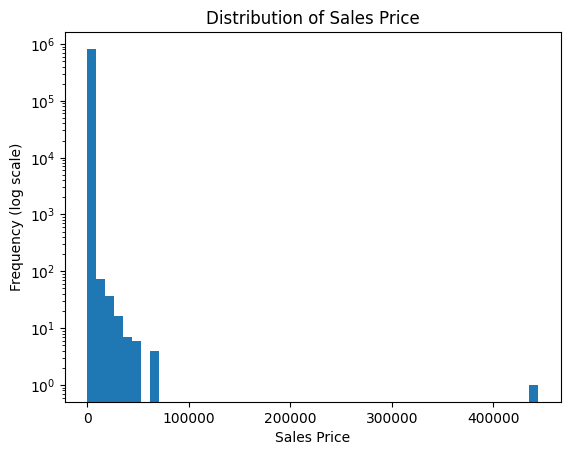

In [25]:
plt.figure()
plt.hist(df['SALES_PRICE'], bins=50)
plt.yscale('log')
plt.xlabel('Sales Price')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Sales Price')
plt.show()

In [26]:
df[['AMOUNT', 'SALES_PRICE']].skew()

AMOUNT         260.699802
SALES_PRICE    441.980940
dtype: float64


Skewness > 0 (Positive): The distribution has a long tail on the right.
Most values are clustered on the left (lower values), with some very high outliers.

In [27]:
df[['AMOUNT', 'SALES_PRICE']].kurt()
# it tell how much is centredd near mean  or how  much it such spread .
## > 3 (excess > 0)	Leptokurtic	Heavy tails, more extreme values

AMOUNT          93722.482996
SALES_PRICE    300491.016178
dtype: float64

sns.displot(df['AMOUNT'], kde=True, color='blue')
plt.title('Distribution of AMOUNT')
plt.show()

sns.displot(df['SALES_PRICE'], kde=True, color='green')
plt.title('Distribution of SALES_PRICE')
plt.show()

plt.figure(figsize=(10, 6))

# ploting  both feature  
sns.kdeplot(df['AMOUNT'], fill=True, label='Amount', color='blue')
sns.kdeplot(df['SALES_PRICE'], fill=True, label='Sales Price', color='orange')

# adding label 
plt.title('Comparison of Density Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()

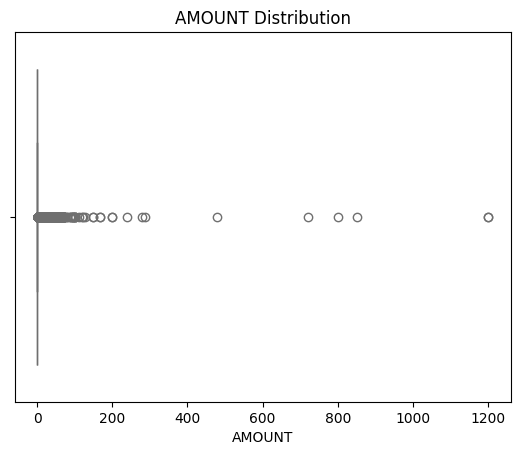

In [28]:
sns.boxplot(x=df['AMOUNT'], color='skyblue')
plt.title('AMOUNT Distribution')
plt.show()

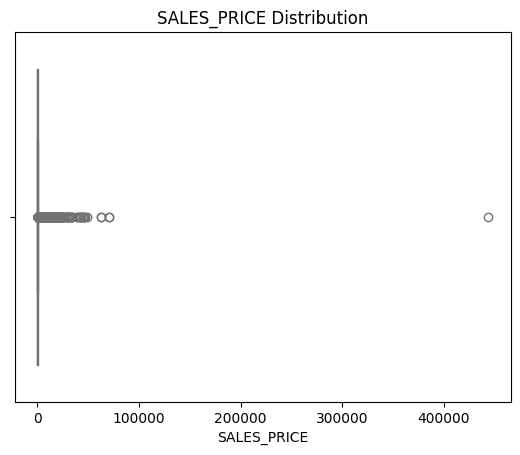

In [29]:
sns.boxplot(x=df['SALES_PRICE'], color='lightgreen')
plt.title('SALES_PRICE Distribution')
plt.show()

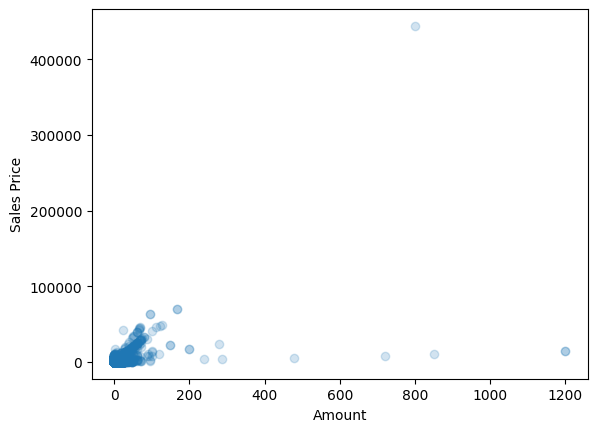

In [30]:
plt.figure()
plt.scatter(df['AMOUNT'], df['SALES_PRICE'], alpha=0.2)
plt.xlabel('Amount')
plt.ylabel('Sales Price')
plt.show()


Outliers here = VIP customers
The extreme values observed represent genuine high-value (VIP) customers

In [31]:
df[['AMOUNT', 'SALES_PRICE']].corr()


,AMOUNT,SALES_PRICE
AMOUNT,1.000000,0.443629
SALES_PRICE,0.443629,1.000000


under stand correlation and follow eda 
is there something wrong i thinking beacuse everything of thses feature is same . why this is happening???

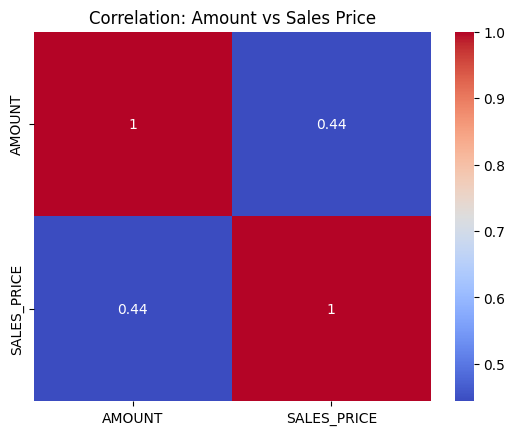

In [32]:
correlation_matrix = df[['AMOUNT', 'SALES_PRICE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation: Amount vs Sales Price')
plt.show()

In [33]:
df['REVENUE'] = df['AMOUNT'] * df['SALES_PRICE']
# we dont need to analysis revenue due to So revenue is a supporting feature, not a feature to explore independently.


In [34]:
df.drop('PIN_CODE', axis=1, inplace=True, errors='ignore')

In [35]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID,REVENUE
542122,1/21/2001,1069,Unknown,110333,4710320224661,1,361,425,TXN_1,425
542544,1/21/2001,1069,Unknown,100311,4710022101208,1,197,198,TXN_1,198
542959,1/21/2001,1069,Unknown,110333,4712603661644,1,313,348,TXN_1,348
89853,11/13/2000,1069,Unknown,100205,9556439880610,1,80,89,TXN_2,89
90164,11/13/2000,1069,Unknown,100314,4710176008699,1,78,98,TXN_2,98


In [36]:
df.tail()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID,REVENUE
265087,12/8/2000,20002000,Unknown,500108,2250271000072,1,9,14,TXN_119577,14
265856,12/8/2000,20002000,Unknown,130109,9300639800080,1,57,66,TXN_119577,66
266234,12/8/2000,20002000,Unknown,110117,78895423037,1,60,62,TXN_119577,62
661318,2/5/2001,20002000,Unknown,110411,4710085120680,3,48,36,TXN_119578,108
665142,2/5/2001,20002000,Unknown,110411,4710085120697,3,48,36,TXN_119578,108


In [45]:
df['TRANSACTION_DT'] = pd.to_datetime(df['TRANSACTION_DT'])
# ensuring feature coloumn date is in date time format becoz library datetime represent time in year-month-day .

In [46]:
snapshot_date = df['TRANSACTION_DT'].max() + dt.timedelta(days=1)
# snapshot date is a day after the last ransaction is done by costumer 
# When you create an instance with days=1, you are defining a time span of 24 hours. 

In [59]:
print(f"Snapshot Date for Recency Calculation: {snapshot_date.date()}\n")

Snapshot Date for Recency Calculation: 2001-03-01



In [49]:
rfm.rename(columns={
    'TRANSACTION_DT': 'RECENCY',
     'TRANSACTION_ID': 'FREQUENCY',
     'REVENUE' : 'MONETARY'
}, inplace = True)

In [48]:
rfm = df.groupby('CUSTOMER_ID').agg({
    'TRANSACTION_DT': lambda x : (snapshot_date - x.max()).days,   # Recency logic = O/T=  get no. of days 
    'TRANSACTION_ID' :  'count',                                # Frequency logic =  no.of transaction on costumer id till sanpshot date.
    'REVENUE' : 'sum'                                              # Monetary logic = revenue off costumer 
})

In [50]:
#Revenue per transaction
avg_revenue_per_trx = df['REVENUE'].mean()


print(f"Average Revenue per Transaction: {avg_revenue_per_trx:.2f}")

Average Revenue per Transaction: 993.39


In [54]:
#AVG revenue per customer
rfm['Avg_Revenue_per_Order'] = rfm['MONETARY'] / rfm['FREQUENCY']

print(rfm[[ 'MONETARY', 'FREQUENCY', 'Avg_Revenue_per_Order']].head())

             MONETARY  FREQUENCY  Avg_Revenue_per_Order
CUSTOMER_ID                                            
1069             2660         11             241.818182
1113             3209         18             178.277778
1250             1795         14             128.214286
1359              602          3             200.666667
1823             6053         14             432.357143


In [55]:
rfm.tail()

,RECENCY,FREQUENCY,MONETARY,Avg_Revenue_per_Order
CUSTOMER_ID,,,,
2179544,1,18,6343,352.388889
2179568,1,5,406,81.200000
2179605,1,52,9495,182.596154
2179643,1,7,8461,1208.714286
20002000,24,452,90397,199.993363


In [56]:
customer_analysis = df.groupby('CUSTOMER_ID').agg(
    total_revenue=('SALES_PRICE', 'sum'), #For each customer, add up every dollar they ever spent.
    total_transactions=('SALES_PRICE', 'count'),#Count how many times their ID appeared in the list (i.e., how many times they visited).
    avg_price_paid=('SALES_PRICE', 'mean'),#Find the average price of the items they buy.
    total_amount_purchased=('AMOUNT', 'sum') #If "amount" refers to the quantity of items, this tells you the total volume they bought.
).reset_index()
customer_analysis['rev_per_trans'] = customer_analysis['total_revenue'] / customer_analysis['total_transactions'] 
# By dividing total_revenue by total_transactions, you see if a customer spends a lot in one go or spreads it out.
customer_analysis['avg_amount_per_trans'] = customer_analysis['total_amount_purchased'] / customer_analysis['total_transactions']
#This tells you the "basket size." Does this customer buy 10 items at a time or just 1?
customer_analysis.head()

,CUSTOMER_ID,total_revenue,total_transactions,avg_price_paid,total_amount_purchased,rev_per_trans,avg_amount_per_trans
0,1069,1944,11,176.727273,16,176.727273,1.454545
1,1113,2230,18,123.888889,23,123.888889,1.277778
2,1250,1583,14,113.071429,18,113.071429,1.285714
3,1359,364,3,121.333333,4,121.333333,1.333333
4,1823,2607,14,186.214286,25,186.214286,1.785714


TOTAL REVENUE = on a costumer id total amount of revenue generated ( amount*sales price
TOTAL TRANSACTION = on a costumer id how many total transaction exist 
avg price paid =  avg sales price on a transaction (total revnue/ total transaction) 
 total amount purchased = total product bought 
 rev per transaction = revenue generated per transaction  (total revnue/ total transaction) 
avg_amount_per_trans =  product bought per transaction 

In [57]:
customer_analysis.tail()

,CUSTOMER_ID,total_revenue,total_transactions,avg_price_paid,total_amount_purchased,rev_per_trans,avg_amount_per_trans
32261,2179544,3753,18,208.500000,27,208.500000,1.500000
32262,2179568,406,5,81.200000,5,81.200000,1.000000
32263,2179605,6001,52,115.403846,70,115.403846,1.346154
32264,2179643,887,7,126.714286,28,126.714286,4.000000
32265,20002000,48995,452,108.396018,628,108.396018,1.389381


# Create a new dataframe containing only high-value sales
high_sales = df[df['SALES_PRICE'] > 400000]

# View the result
print(high_sales)

here we doing rfm analyssis on costumer level and above we dome rfm feature analysis 

 it means:
The code scanned your entire TRANSACTION_DT column.
It found that the very last sale recorded in your file was on 2003-02-28.
It added 1 day to that date to create the snapshot.

In [61]:
print(rfm)

             RECENCY  FREQUENCY  MONETARY  Avg_Revenue_per_Order
CUSTOMER_ID                                                     
1069              19         11      2660             241.818182
1113              54         18      3209             178.277778
1250              19         14      1795             128.214286
1359              87          3       602             200.666667
1823              36         14      6053             432.357143
...              ...        ...       ...                    ...
2179544            1         18      6343             352.388889
2179568            1          5       406              81.200000
2179605            1         52      9495             182.596154
2179643            1          7      8461            1208.714286
20002000          24        452     90397             199.993363

[32266 rows x 4 columns]


here we get new dataset of rfm at costumer level ,now we analsyse it and try to reach to conclusion and understand 
this data so that we can explain costumer status and value

why we are doing this ??
ans = becoz the rfm is a no which we assign to each costumer to know their value 

In [62]:
rfm['R_Score'] = pd.qcut(rfm['RECENCY'], q=5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['FREQUENCY'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['MONETARY'], q=5, labels=[1, 2, 3, 4, 5])

here in recency we inverted logic because we want to score in 5,4,3,2,1 format costumer becoz rfm work in that way Recency: Lower numbers are better
and frequency & monetary worked in that way normallly Higher numbers are better
    The RANK function is used to arrange data in a specific order (like highest-to-lowest) and
    assign a number to show each item's relative position or importance.

In [63]:
rfm['RFM_segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) +rfm['M_Score'].astype(str)

In [64]:
rfm['RFM_Total_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) +rfm['M_Score'].astype(int)

In [65]:
rfm.head()

,RECENCY,FREQUENCY,MONETARY,Avg_Revenue_per_Order,R_Score,F_Score,M_Score,RFM_segment,RFM_Total_Score
CUSTOMER_ID,,,,,,,,,
1069,19,11,2660,241.818182,3,2,3,323,8
1113,54,18,3209,178.277778,2,3,3,233,8
1250,19,14,1795,128.214286,3,3,2,332,8
1359,87,3,602,200.666667,1,1,1,111,3
1823,36,14,6053,432.357143,3,3,4,334,10


why we are doing this ??
ans =  as this is part of data science interpreatation  number to words n also buiseness Business doesn’t act on numbers 
it act on words here we called as segments 

In [70]:
def categorize_customer_3d(row):
    
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])

    
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'       #CHAMPIONS: Recent, Frequent, AND High Spenders
    
    elif r >= 3 and f >= 3 and m <= 3:
        return 'Loyal Regulars'   #LOYAL: Good Recency/Frequency, but moderate spenders
    
    elif r >= 4 and f <= 2 and m >= 4:   #BIG SPENDERS (Potential): Recent, High Spend, but Low Frequency
        return 'Big Spenders'         # (They came recently and spent a LOT, but haven't visited often yet)
    
    elif r >= 4 and f <= 2 and m <= 3:  #NEW CUSTOMERS: Recent, Low Frequency, Low Spend
        return 'New Customers'   # (Typical new user trying the platform)
    
    elif r <= 2 and m >= 4:     #  RISK WHALES: Low Recency, but they used to Spend Big! # (We must win these back because they have money)
        return 'At Risk Whales'  
    
    elif r <= 2 and f >= 3 and m <= 3:  #AT RISK REGULARS: Low Recency, High Frequency, Low Spend
        return 'At Risk Regulars'        # (They visited often but didn't spend much, and now they are gone)
    
    else:
        return 'Lost'     # LOST: Low everything


rfm['Segment_3D'] = rfm.apply(categorize_customer_3d, axis=1)

In [71]:
print(rfm[['R_Score', 'F_Score', 'M_Score', 'Segment_3D']])

            R_Score F_Score M_Score        Segment_3D
CUSTOMER_ID                                          
1069              3       2       3              Lost
1113              2       3       3  At Risk Regulars
1250              3       3       2    Loyal Regulars
1359              1       1       1              Lost
1823              3       3       4              Lost
...             ...     ...     ...               ...
2179544           5       3       4              Lost
2179568           5       2       1     New Customers
2179605           5       5       5         Champions
2179643           5       2       5      Big Spenders
20002000          3       5       5              Lost

[32266 rows x 4 columns]


In [72]:
rfm.head()

,RECENCY,FREQUENCY,MONETARY,Avg_Revenue_per_Order,R_Score,F_Score,M_Score,RFM_segment,RFM_Total_Score,Segment_3D
CUSTOMER_ID,,,,,,,,,,
1069,19,11,2660,241.818182,3,2,3,323,8,Lost
1113,54,18,3209,178.277778,2,3,3,233,8,At Risk Regulars
1250,19,14,1795,128.214286,3,3,2,332,8,Loyal Regulars
1359,87,3,602,200.666667,1,1,1,111,3,Lost
1823,36,14,6053,432.357143,3,3,4,334,10,Lost


general understanding of how many custumer exist in each segment and segment wise rfm analysis 

In [79]:
rfm = rfm.reset_index()


In [80]:
rfm.head()

,index,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY,Avg_Revenue_per_Order,R_Score,F_Score,M_Score,RFM_segment,RFM_Total_Score,Segment_3D
0,0,1069,19,11,2660,241.818182,3,2,3,323,8,Lost
1,1,1113,54,18,3209,178.277778,2,3,3,233,8,At Risk Regulars
2,2,1250,19,14,1795,128.214286,3,3,2,332,8,Loyal Regulars
3,3,1359,87,3,602,200.666667,1,1,1,111,3,Lost
4,4,1823,36,14,6053,432.357143,3,3,4,334,10,Lost


In [73]:
rfm.reset_index(inplace=True)

In [85]:
rfm_segments = rfm[['Segment_3D']]


In [87]:
print(df.columns)
print(rfm_segments.columns)


Index(['TRANSACTION_DT', 'CUSTOMER_ID', 'AGE_GROUP', 'PRODUCT_SUBCLASS',
       'PRODUCT_ID', 'AMOUNT', 'ASSET', 'SALES_PRICE', 'TRANSACTION_ID',
       'REVENUE'],
      dtype='str')
Index(['Segment_3D'], dtype='str')


In [88]:
rfm = rfm.reset_index()
print(rfm.columns)


Index(['level_0', 'index', 'CUSTOMER_ID', 'RECENCY', 'FREQUENCY', 'MONETARY',
       'Avg_Revenue_per_Order', 'R_Score', 'F_Score', 'M_Score', 'RFM_segment',
       'RFM_Total_Score', 'Segment_3D'],
      dtype='str')


In [89]:
rfm_segments = rfm[['CUSTOMER_ID', 'Segment_3D']]
print(rfm_segments.head())


   CUSTOMER_ID        Segment_3D
0         1069              Lost
1         1113  At Risk Regulars
2         1250    Loyal Regulars
3         1359              Lost
4         1823              Lost


In [90]:
df = df.merge(rfm_segments, on="CUSTOMER_ID", how="left")


In [91]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID,REVENUE,Segment_3D
0,2001-01-21,1069,Unknown,110333,4710320224661,1,361,425,TXN_1,425,Lost
1,2001-01-21,1069,Unknown,100311,4710022101208,1,197,198,TXN_1,198,Lost
2,2001-01-21,1069,Unknown,110333,4712603661644,1,313,348,TXN_1,348,Lost
3,2000-11-13,1069,Unknown,100205,9556439880610,1,80,89,TXN_2,89,Lost
4,2000-11-13,1069,Unknown,100314,4710176008699,1,78,98,TXN_2,98,Lost


In [74]:
Segment_analysis = rfm.groupby('Segment_3D').agg({
    'RECENCY' : 'mean',
    'FREQUENCY' : 'mean',
    'MONETARY' : 'mean',
    'CUSTOMER_ID' : 'count'
})


In [75]:
Segment_analysis = Segment_analysis.round(1)
Segment_analysis.rename(columns={
    'RECENCY': 'Avg Recency (Days)',
    'FREQUENCY': 'Avg Frequency',
    'MONETARY': 'Avg Revenue',
    'CUSTOMER_ID': 'No. of Customers'
}, inplace=True)

In [76]:
print(Segment_analysis)

                  Avg Recency (Days)  Avg Frequency  Avg Revenue  \
Segment_3D                                                         
At Risk Regulars                70.8           17.6       2118.7   
At Risk Whales                  66.4           27.0      23848.3   
Big Spenders                     8.0            6.8      23283.2   
Champions                        7.3           66.1      87154.8   
Lost                            54.6           12.6      13239.8   
Loyal Regulars                  15.4           20.3       2312.1   
New Customers                    8.6            5.3       1043.8   

                  No. of Customers  
Segment_3D                          
At Risk Regulars              2972  
At Risk Whales                3045  
Big Spenders                   360  
Champions                     6356  
Lost                         11861  
Loyal Regulars                4758  
New Customers                 2914  


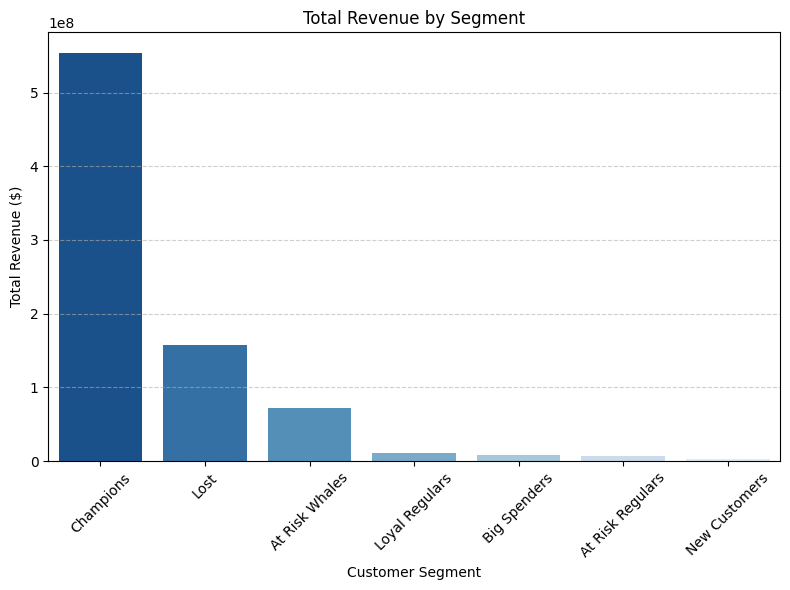

In [77]:
segment_revenue = rfm.groupby('Segment_3D')['MONETARY'].sum().reset_index().sort_values('MONETARY', ascending=False)

plt.figure(figsize=(8, 6))

# Plot the bars
sns.barplot(
    data=segment_revenue, 
    x='Segment_3D', 
    y='MONETARY', 
    hue='Segment_3D', 
    palette='Blues_r'
)

plt.title('Total Revenue by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45) # Tilt the labels so they fit
plt.legend([],[], frameon=False) # Hide the legend (redundant)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('segment_revenue_bar.png')
plt.show()

High-value customers are a small percentage but contribute a large share of total revenue.


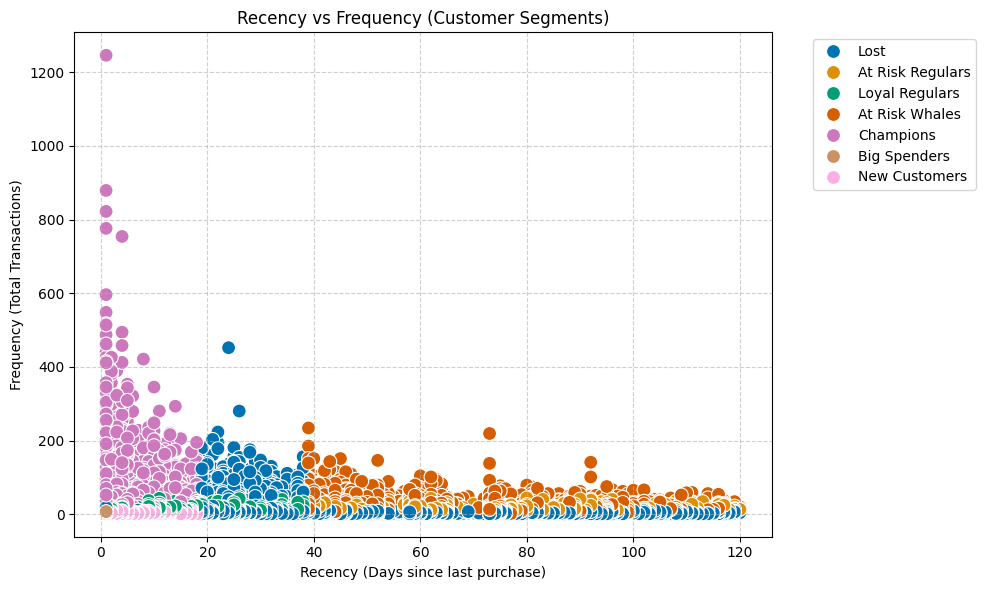

In [78]:
plt.figure(figsize=(10, 6))

# Plot the points
sns.scatterplot(
    data=rfm, 
    x='RECENCY', 
    y='FREQUENCY', 
    hue='Segment_3D',  # Color by Segment
    palette='colorblind', # Color scheme
    s=100              # Dot size
)

plt.title('Recency vs Frequency (Customer Segments)')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Total Transactions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('rfm_scatter.png')
plt.show()

Customers with low recency and high frequency show the strongest retention potential.
New and emerging customers show early repeat behavior but lower monetary value.

The RFM analysis deeply understood the pattern of customer shopping on the basis of their recent
, frequent purchases and the value of their purchases and clearly differentiated customer engagement
   and contribution. A tiny fraction of top spenders are responsible for the majority of the revenue
whereas some segments display the fading of their activities and thus targeted retention strategies will be necessary.
    Such understandings facilitate marketing efforts driven by data like customized offers, loyalty programs, 
    and reactivation campaigns. Next time, combining RFM segmentation with Market Basket Analysis may be
    used for finer personalization by suggesting fitting product bundles to different customer segments."

In [ ]:
df.to_csv("rfm_prepared_data.csv", index=False)


In [81]:
df.to_csv("rfm.csv" , index = False)

In [84]:
rfm.to_csv("Customer_RFM_Segment.csv", index=False)


In [92]:
df.to_csv("merge data.csv", index=False)